# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

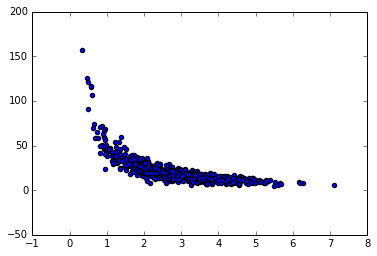

In [38]:
%matplotlib inline
from pylab import *

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [39]:
from scipy.optimize import curve_fit
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

#p4 = np.poly1d(np.polyfit(x, y, 4))
def func(x, a, c, d):
    return a*np.exp(-c*x)+d
#p4 = np.poly1d(np.polyfit(x, y, 4))
popt, pcov = curve_fit(func, x, y, [1,0.001,1])
print popt

[ 178.97088917    1.44855715   13.42901102]


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

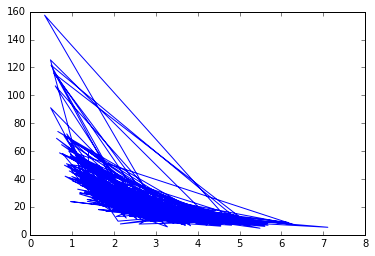

In [41]:
plot(x,y)
xx=linspace(-1,8,0.01)
#plot(xx,func(xx,*popt))
show()

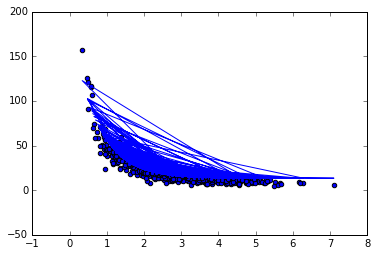

In [17]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plot(x,func(x,*popt))
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print r2


0.82937663963


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?